# 다중선형회귀연습문제

In [1]:
from pandas import read_excel
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# 모델을 구성하기위한 객체
from tensorflow.keras.models import Sequential
# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense
# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 학습에 대한 콜백함수 처리용 패키지 참조
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# 정규화 처리 패키지
from sklearn.preprocessing import MinMaxScaler
# 회귀분석을 수행하는 통계 패키지 (머신러닝과는 연관 없음)
from statsmodels.formula.api import ols

## 1)

In [2]:
df = read_excel('http://itpaper.co.kr/data/blood_fat.xlsx', engine='openpyxl')
df

,체중,나이,혈중지방함량
0,84,46,354
1,73,20,190
2,65,52,405
3,70,30,263
4,76,57,451
5,69,25,302
6,63,28,288
7,72,36,385
8,79,57,402
9,75,44,365


In [3]:
mms = MinMaxScaler()
normal_df = DataFrame(mms.fit_transform(df), index=df.index, columns=df.columns)
normal_df

,체중,나이,혈중지방함량
0,0.919355,0.650,0.640741
1,0.741935,0.000,0.033333
2,0.612903,0.800,0.829630
3,0.693548,0.250,0.303704
4,0.790323,0.925,1.000000
5,0.677419,0.125,0.448148
6,0.580645,0.200,0.396296
7,0.725806,0.400,0.755556
8,0.838710,0.925,0.818519
9,0.774194,0.600,0.681481


In [4]:
# 독립변수
x_train_set = normal_df.filter(['체중', '나이'])
# 종속변수
y_train_set = normal_df.filter(['혈중지방함량'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_train_set, y_train_set, test_size = 0.33, random_state = 777)
print("훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 16, 검증용 데이터셋 크기: 9


In [6]:
# 데이터가 단순하고 개수가 적다면 과대적합이 발생할 확률이 높기 때문에 주의하면서 적절한 크기의 모델층을 쌓아야 한다.
model = Sequential()
# 2차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (2, )))
model.add(Dense(32, activation = 'relu'))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1),
    ModelCheckpoint(filepath = '{epoch:02d}-{val_loss:.5f}.h5', monitor = 'val_loss', verbose=1, save_best_only = True)
])
result.history.keys()

Epoch 1/500
1/1 [==============================] - 0s 423ms/step - loss: 0.3750 - mae: 0.5465 - val_loss: 0.2108 - val_mae: 0.3781

Epoch 00001: val_loss improved from inf to 0.21078, saving model to 01-0.21078.h5
Epoch 2/500
1/1 [==============================] - 0s 17ms/step - loss: 0.3551 - mae: 0.5294 - val_loss: 0.1976 - val_mae: 0.3649

Epoch 00002: val_loss improved from 0.21078 to 0.19763, saving model to 02-0.19763.h5
Epoch 3/500
1/1 [==============================] - 0s 17ms/step - loss: 0.3360 - mae: 0.5126 - val_loss: 0.1850 - val_mae: 0.3524

Epoch 00003: val_loss improved from 0.19763 to 0.18500, saving model to 03-0.18500.h5
Epoch 4/500
1/1 [==============================] - 0s 20ms/step - loss: 0.3177 - mae: 0.4960 - val_loss: 0.1730 - val_mae: 0.3403

Epoch 00004: val_loss improved from 0.18500 to 0.17305, saving model to 04-0.17305.h5
Epoch 5/500
1/1 [==============================] - 0s 18ms/step - loss: 0.3005 - mae: 0.4801 - val_loss: 0.1618 - val_mae: 0.3285

Epoc

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])

In [8]:
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,0.374955,0.546467,0.210777,0.378089,0.0010
2,0.355086,0.529414,0.197630,0.364865,0.0010
3,0.335955,0.512581,0.184998,0.352372,0.0010
4,0.317704,0.496048,0.173047,0.340264,0.0010
5,0.300546,0.480101,0.161812,0.328510,0.0010
6,0.284110,0.465254,0.151349,0.317173,0.0010
7,0.268616,0.451325,0.141558,0.306168,0.0010
8,0.254189,0.437842,0.132195,0.295265,0.0010
9,0.240447,0.424574,0.123561,0.284798,0.0010


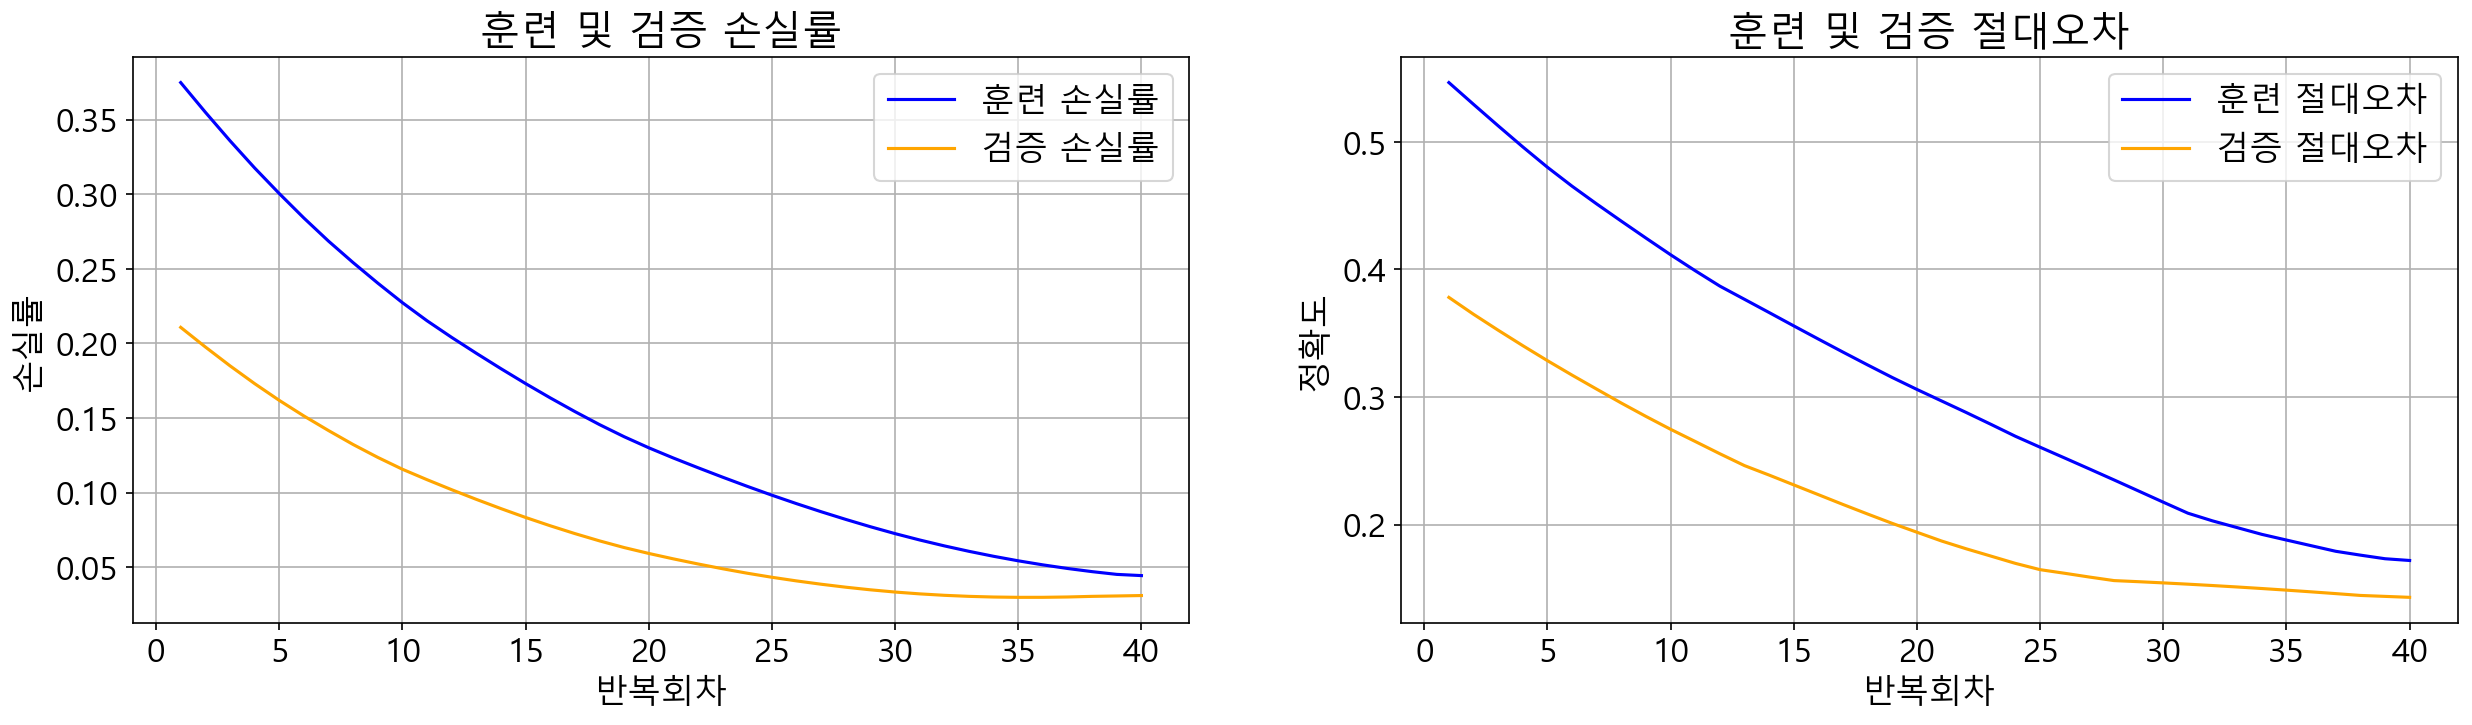

In [9]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sns.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sns.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

In [10]:
evaluate = model.evaluate(x_test, y_test)
print("최종 손실률: %f, 최종 절대오차: %f" % (evaluate[0], evaluate[1]))

1/1 [==============================] - 0s 17ms/step - loss: 0.0309 - mae: 0.1430
최종 손실률: 0.030898, 최종 절대오차: 0.142987


In [11]:
# 검증 데이터를 활용하여 dist 예측하기
test_predictions = model.predict(x_test)
test_predictions

array([[0.4447766 ],
       [0.6779252 ],
       [0.51322484],
       [0.20145027],
       [0.53560597],
       [0.40047848],
       [0.4053935 ],
       [0.59229684],
       [0.35027754]], dtype=float32)

In [12]:
# 2차 배열의 원소들을 1차 배열로 재배치
test_pred_flatten = test_predictions.flatten()
test_pred_flatten

array([0.4447766 , 0.6779252 , 0.51322484, 0.20145027, 0.53560597,
       0.40047848, 0.4053935 , 0.59229684, 0.35027754], dtype=float32)

In [13]:
y_test['혈중지방함량'].values

array([0.45185185, 0.81851852, 0.34444444, 0.1037037 , 0.68148148,
       0.14444444, 0.3037037 , 0.61111111, 0.        ])

In [14]:
result_df = x_test.copy()
result_df['실제값'] = y_test['혈중지방함량'].values
result_df['예측값'] = test_pred_flatten
result_df['예측오차'] = result_df['실제값']-result_df['예측값']
result_df

,체중,나이,실제값,예측값,예측오차
23,0.451613,0.500,0.451852,0.444777,0.007075
8,0.838710,0.925,0.818519,0.677925,0.140593
22,0.935484,0.425,0.344444,0.513225,-0.168780
10,0.000000,0.100,0.103704,0.201450,-0.097747
9,0.774194,0.600,0.681481,0.535606,0.145876
16,0.532258,0.350,0.144444,0.400478,-0.256034
3,0.693548,0.250,0.303704,0.405394,-0.101690
12,0.612903,0.800,0.611111,0.592297,0.018814
21,0.645161,0.075,0.000000,0.350278,-0.350278


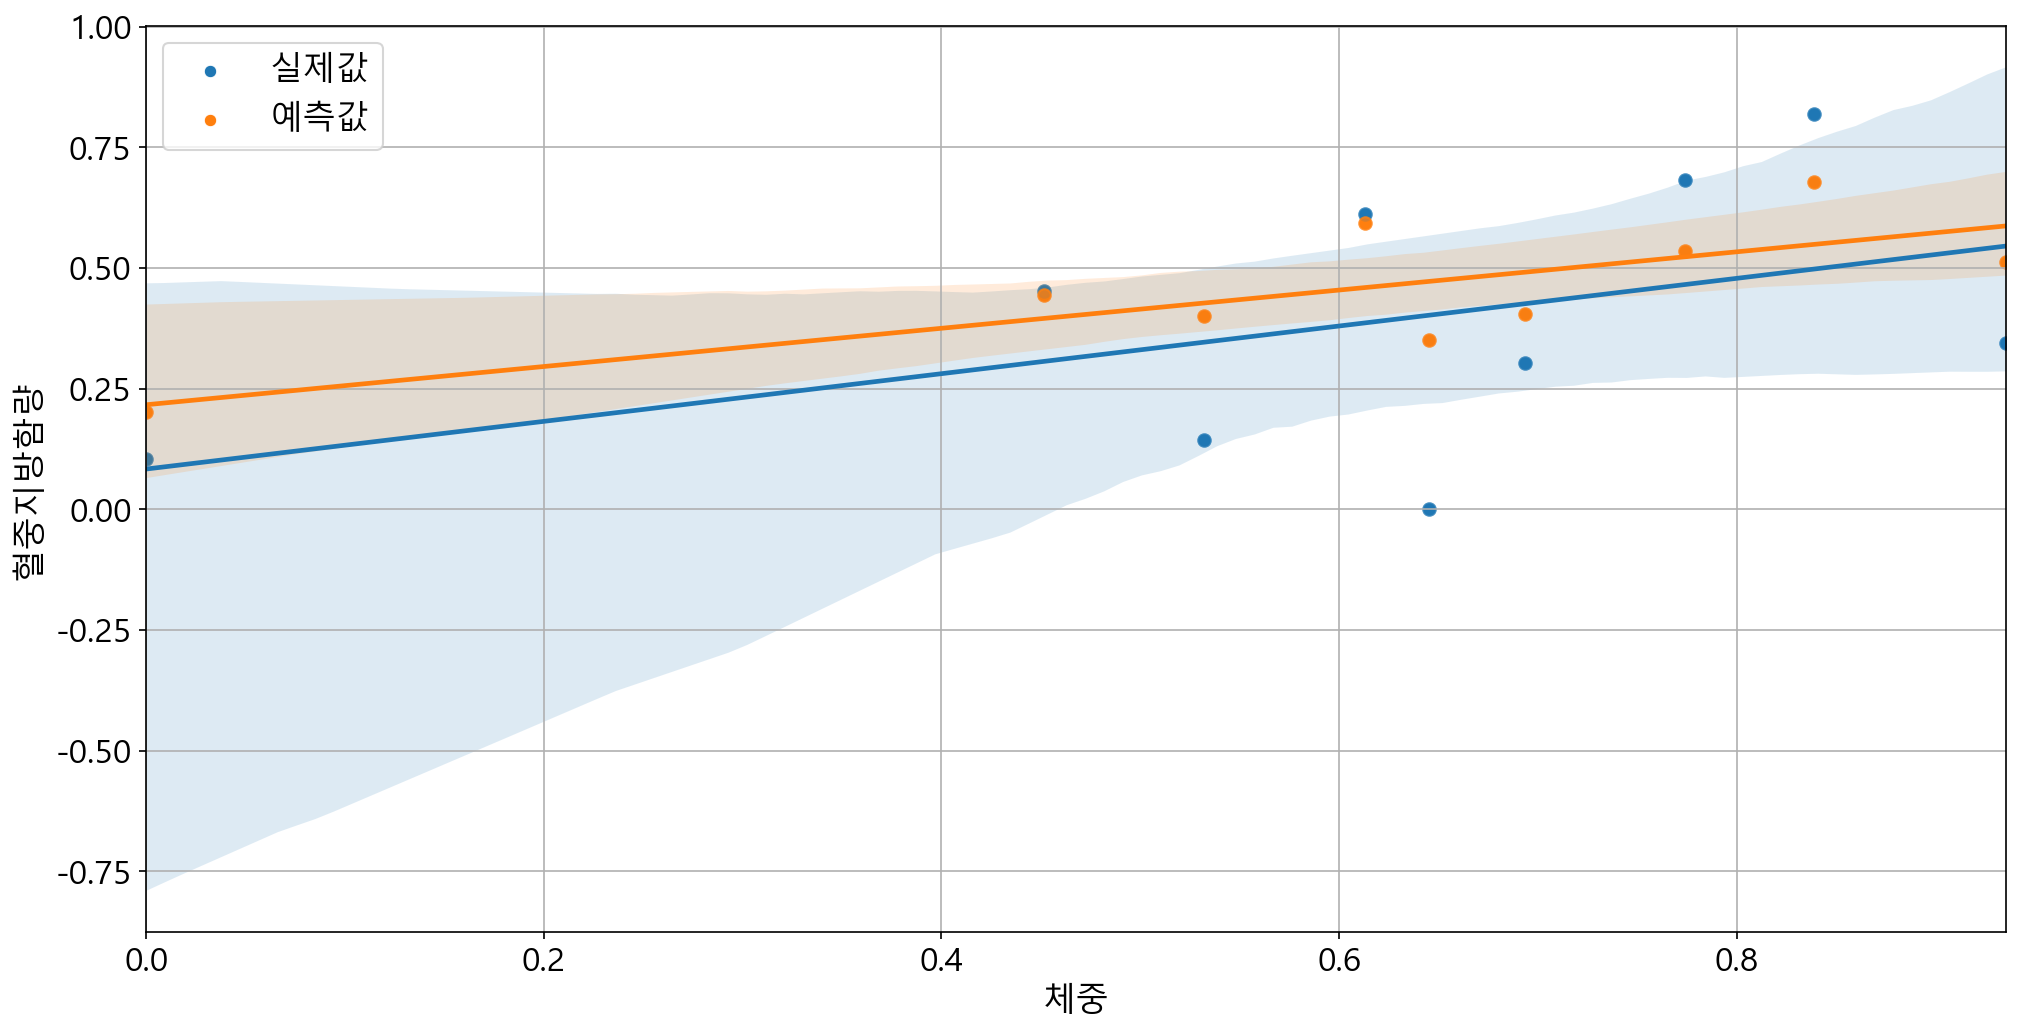

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=150)
sns.scatterplot(x='체중', y='실제값', data=result_df, label='실제값')
sns.scatterplot(x='체중', y='예측값', data=result_df, label='예측값')
sns.regplot(x='체중', y='실제값', data=result_df)
sns.regplot(x='체중', y='예측값', data=result_df)
ax.set_xlabel('체중')
ax.set_ylabel('혈중지방함량')
ax.legend()
ax.grid()

plt.show()
plt.close()

In [16]:
model_2 = ols('혈중지방함량 ~ 체중 + 나이', data=normal_df)
fit = model_2.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 혈중지방함량   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     26.36
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.44e-06
Time:                        10:00:48   Log-Likelihood:                 11.418
No. Observations:                  25   AIC:                            -16.84
Df Residuals:                      22   BIC:                            -13.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0466      0.117      0.398      0.694      -0.196       0.289
체중             0.0958      0.167      0.573      0.573      -0.251       0.443
나이             0.7728      0.112      6.889      0.000       0.540       1.005
==============================================================================
Omnibus:                        0.810   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.815
Skew:                           0.363   Prob(JB):                        0.665
Kurtosis:                       2.495   Cond. No.                         7.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
fit.fittedvalues

0     0.637052
1     0.117710
2     0.723607
3     0.306280
4     0.837214
5     0.208131
6     0.256818
7     0.425296
8     0.841851
9     0.584499
10    0.123887
11    0.354971
12    0.723607
13    0.150940
14    0.868898
15    0.652507
16    0.368105
17    0.725927
18    0.700423
19    0.402112
20    0.598408
21    0.166398
22    0.464712
23    0.476300
24    0.295460
dtype: float64

In [18]:
result_df['분석값'] = fit.fittedvalues
result_df['분석오차'] = result_df['실제값']-result_df['분석값']
result_df

,체중,나이,실제값,예측값,예측오차,분석값,분석오차
23,0.451613,0.500,0.451852,0.444777,0.007075,0.476300,-0.024448
8,0.838710,0.925,0.818519,0.677925,0.140593,0.841851,-0.023333
22,0.935484,0.425,0.344444,0.513225,-0.168780,0.464712,-0.120267
10,0.000000,0.100,0.103704,0.201450,-0.097747,0.123887,-0.020183
9,0.774194,0.600,0.681481,0.535606,0.145876,0.584499,0.096983
16,0.532258,0.350,0.144444,0.400478,-0.256034,0.368105,-0.223661
3,0.693548,0.250,0.303704,0.405394,-0.101690,0.306280,-0.002576
12,0.612903,0.800,0.611111,0.592297,0.018814,0.723607,-0.112496
21,0.645161,0.075,0.000000,0.350278,-0.350278,0.166398,-0.166398


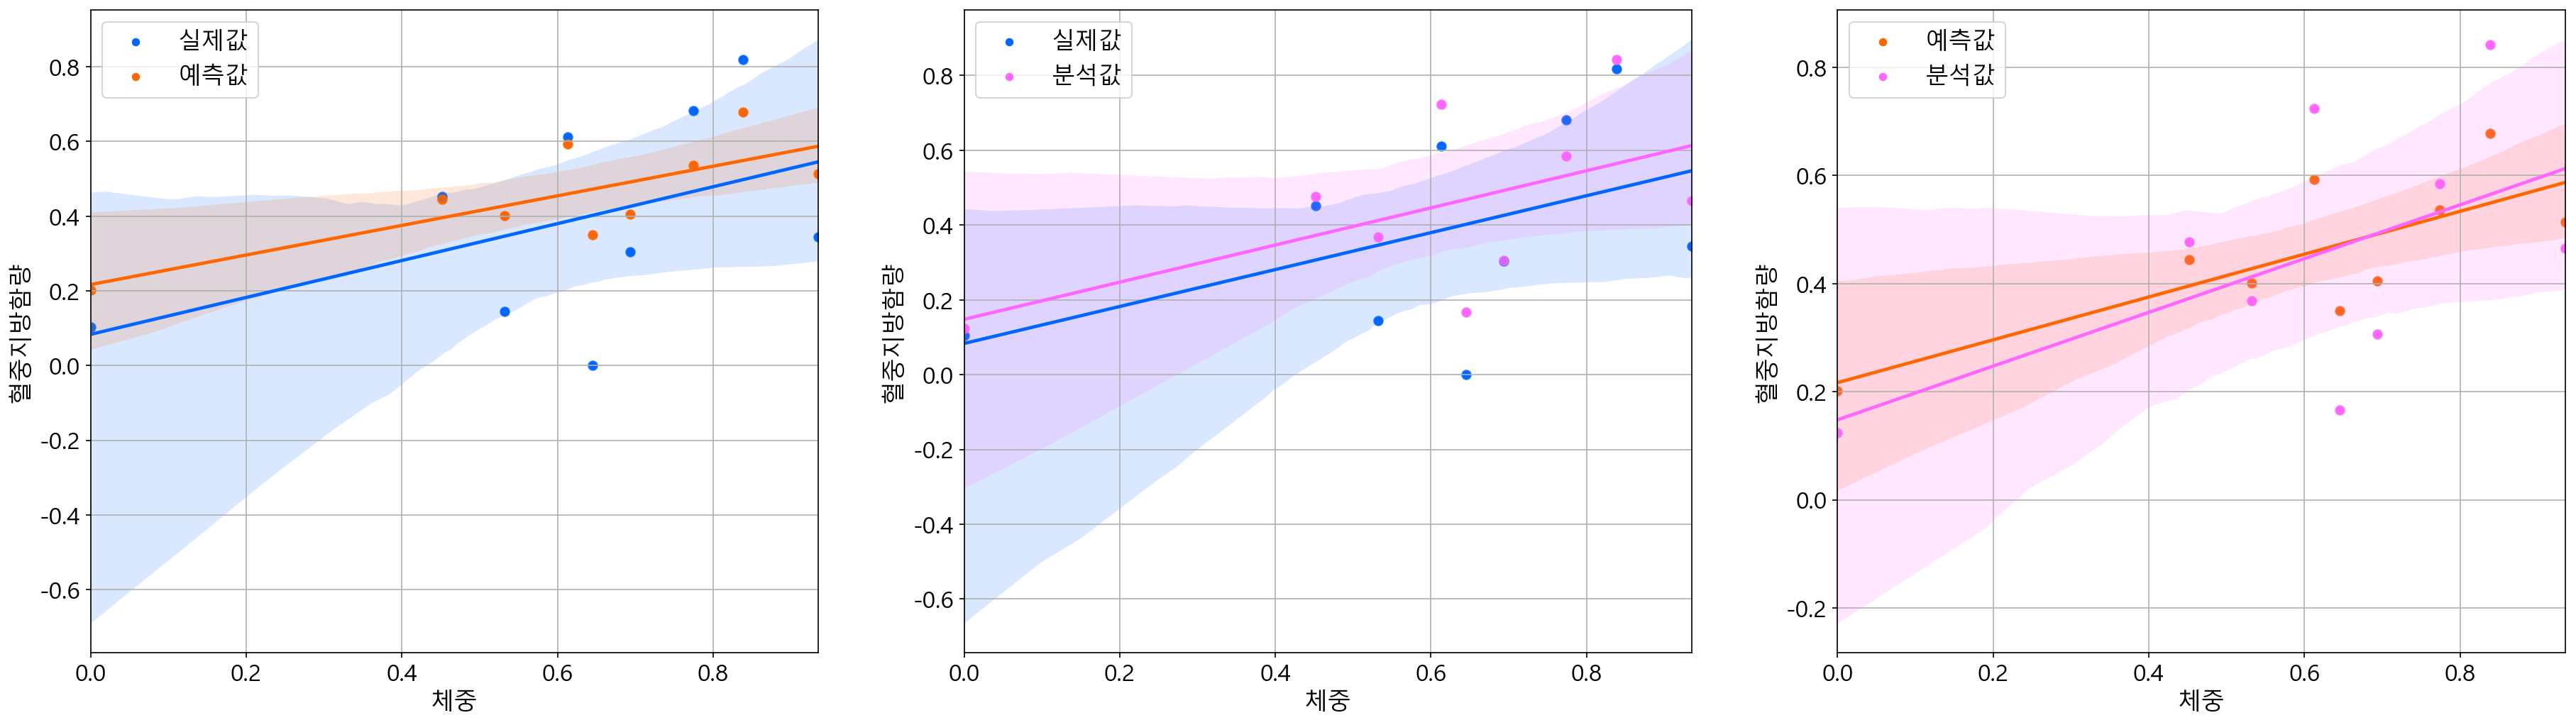

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 8), dpi=150)
sns.scatterplot(x='체중', y='실제값', data=result_df, color='#0066ff', label='실제값', ax=ax1)
sns.scatterplot(x='체중', y='예측값', data=result_df, label='예측값', color='#ff6600', ax=ax1)
sns.regplot(x='체중', y='실제값', data=result_df, color='#0066ff', ax=ax1)
sns.regplot(x='체중', y='예측값', data=result_df, color='#ff6600', ax=ax1)

sns.scatterplot(x='체중', y='실제값', data=result_df, color='#0066ff', label='실제값', ax=ax2)
sns.scatterplot(x='체중', y='분석값', data=result_df, label='분석값', color='#ff66ff', ax=ax2)
sns.regplot(x='체중', y='실제값', data=result_df, color='#0066ff', ax=ax2)
sns.regplot(x='체중', y='분석값', data=result_df, color='#ff66ff',ax=ax2)

sns.scatterplot(x='체중', y='예측값', data=result_df, label='예측값', color='#ff6600', ax=ax3)
sns.scatterplot(x='체중', y='분석값', data=result_df, label='분석값', color='#ff66ff',ax=ax3)
sns.regplot(x='체중', y='예측값', data=result_df, color='#ff6600', ax=ax3)
sns.regplot(x='체중', y='분석값', data=result_df, color='#ff66ff',ax=ax3)

ax1.set_xlabel('체중')
ax1.set_ylabel('혈중지방함량')
ax1.legend(loc='upper left')
ax1.grid()

ax2.set_xlabel('체중')
ax2.set_ylabel('혈중지방함량')
ax2.legend(loc='upper left')
ax2.grid()

ax3.set_xlabel('체중')
ax3.set_ylabel('혈중지방함량')
ax3.legend(loc='upper left')
ax3.grid()

plt.show()
plt.close()

In [20]:
result_df['예측오차'].mean()

-0.07357444668748252

In [21]:
result_df['분석오차'].mean()

-0.06626436910655507

### 머신러닝 모델을 통한 예측결과의 오차가 통계조사 결과의 손실율 보다 큰 것을 볼 수 있다. 이는 표본의 수가 작아서 머신러닝이 가중치를 구하는데 더 불리하다고 생각된다. 

## 2)

In [89]:
my_info = DataFrame({'체중':[df['체중'].min(),70,df['체중'].max()], '나이':[df['나이'].min(),26,df['나이'].max()], '혈중지방함량':[df['혈중지방함량'].min(),np.nan,df['혈중지방함량'].max()]})
my_info

print('결과를 볼때 정규화된 값을 다시 역정규화하여 확인하기 위해 본래 데이터의 최소, 최대값도 같이 넣어준다.')

결과를 볼때 정규화된 값을 다시 역정규화하여 확인하기 위해 본래 데이터의 최소, 최대값도 같이 넣어준다.


In [91]:
mms = MinMaxScaler()
normal_df = DataFrame(mms.fit_transform(my_info), index=my_info.index, columns=my_info.columns)
normal_df


,체중,나이,혈중지방함량
0,0.000000,0.00,0.0
1,0.693548,0.15,NaN
2,1.000000,1.00,1.0


- 모델에 적용하기 위해 정규화 적용

In [81]:
my_predict = model.predict(normal_df.filter(['체중','나이']))
my_predict

array([[0.17224018],
       [0.38210163],
       [0.73334426]], dtype=float32)

- 가운데 값이 정규화된 예측값

In [82]:
flatten = my_predict.flatten()
flatten

array([0.17224018, 0.38210163, 0.73334426], dtype=float32)

In [83]:
my_predict_2 = fit.predict(normal_df.filter(['체중','나이']))
my_predict_2

0    0.046604
1    0.228997
2    0.915271
dtype: float64

In [84]:
normal_df['혈중지방함량'] = my_predict
normal_df

,체중,나이,혈중지방함량
0,0.000000,0.00,0.172240
1,0.693548,0.15,0.382102
2,1.000000,1.00,0.733344


In [86]:
inverse_scaled_data = mms.inverse_transform(normal_df)
inverse_scaled_data

array([[ 27.        ,  20.        , 227.50484934],
       [ 70.        ,  26.        , 284.16743881],
       [ 89.        ,  60.        , 379.00294936]])

- 예측 모델을 통해 예측한 값으로 컬럼을 바꾸고 역정규화를 실시했다.
- 예측 모델을 통한 혈중지방함량 예측값은 284.17 이다

In [87]:
normal_df['혈중지방함량'] = my_predict_2
normal_df

,체중,나이,혈중지방함량
0,0.000000,0.00,0.046604
1,0.693548,0.15,0.228997
2,1.000000,1.00,0.915271


In [88]:
inverse_scaled_data = mms.inverse_transform(normal_df)
inverse_scaled_data

array([[ 27.        ,  20.        , 193.58313146],
       [ 70.        ,  26.        , 242.82924656],
       [ 89.        ,  60.        , 428.12321394]])

- 통계 모델을 통해 예측한 값으로 컬럼을 바꾸고 역정규화를 실시했다.
- 통계 모델을 통한 혈중지방함량 예측값은 242.83 이다

### 예측모델을 통한 예측값은 284.17, 통계 모델을 통한 예측값은 242.83으로 예측 모델을 통한 예측값이 더 크게 나왔다.